<a href="https://colab.research.google.com/github/lsmanoel/PythonCodes/blob/master/zbar/barcode_zbar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ZBar - Barcode Reader (Leitor de códigos de barra)

[zbar.sourceforge.net/](http://zbar.sourceforge.net/)

ZBar é uma biblioteca de código aberto para leitura de código de barras e QRcodes. Com essa biblioteca é possível fazer a leitura de códigos tanto em imagens estáticas quanto em videos. Essa suporta diferentes simbologias de códigos de barra como:
* EAN-13/UPC-A
* UPC-E, EAN-8
* Code 128
* Code 39 
* Interleaved 2 of 5
* QR Code.

[Tipos de Código de Barras.](https://edisciplinas.usp.br/pluginfile.php/4263115/mod_resource/content/3/Quadro%20Tipos%20de%20C%C3%B3dogo%20de%20Barras.pdf)

[Guia completo sobre código de barras no Brasil.](https://pt.shopify.com/blog/69456645-guia-completo-sobre-codigo-de-barras-no-brasil)

A biblioteca ZBar utiliza uma abordagem próxima as utilizadas pelas '*wand scanners*" e"*laser scanners*" só que de forma puramente computacional.

[Mais sobre leitores de código de barras.](http://www.adams1.com/gif/wandpic.jpg)

**Wand Scanner:**

![alt text](https://http2.mlstatic.com/caneta-leitora-de-codigo-de-barras-econowand-boletos-e-nfs-D_NQ_NP_847018-MLB25760363080_072017-F.jpg)

**Laser Scanner:**

![alt text](https://i.ebayimg.com/images/g/ZlkAAOSwaXpb2WfN/s-l300.jpg)



A ideia desse tutorial é demostrar o funcionamento da biblioteca ZBar por meia da linguagem python rodando no  [Google Colab Notebook](https://colab.research.google.com/notebooks/welcome.ipynb#recent=true), porém essa biblioteca oferece a possibilidade de uso com diferentes linguagens de programação (Python, Perl, C++, C).

Para instalar a biblioteca nas distribuições linux baseadas no Debian (como Ubuntu ou Raspbian):
 	
`$ sudo apt-get install libzbar0`

macOS:
	
`$ brew install zbar`


Para instalar a biblioteca na máquina virtual do Google Colab:

In [34]:
!apt-get install libzbar0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libzbar0 is already the newest version (0.10+doc-10.1build2).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


Depois de instalada a bilioteca é necessário instalar o pacote python dessa bilbioteca para que essa possa ser importada e utilizada:

In [35]:
!pip install pyzbar

In [36]:
# import the necessary packages
from pyzbar import pyzbar
import matplotlib.pyplot as plt
import cv2

cv2.__version__

'3.4.3'

Para acessar arquivos do google drive no Google Colab, é possivel montar a sua unidade de disco na máquina virtual: 





In [37]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Após feita a montagem do google drive será possível acessar um arquivo de imagem contendo um código de barras com o pacote [matplotlib](https://matplotlib.org/). O endereço da imagem deve corresponder onde ela está localizada no seu google drive, no caso do meu google drive:

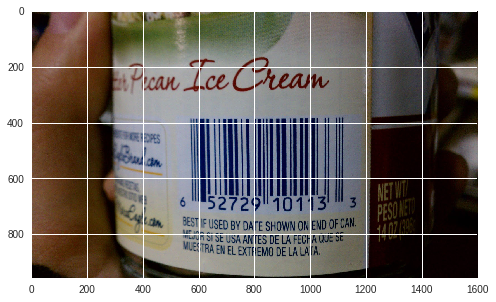

In [38]:
import matplotlib.pyplot as plt

image = plt.imread("gdrive/My Drive/Colab Notebooks/OpenCV/dataset/barcode_1.jpg")

plt.imshow(image)

E a função implementada abaixo é responsável por fazer a leitura de todos os códigos de barras encontrados na figura e retornar a string contendo o valor do código de barras:

In [0]:
import cv2
from pyzbar import pyzbar

def barcode_reader(image):
  # localiza todos os barcodes encontrados na imagem e os decodifica:
  barcodes = pyzbar.decode(image)

  text_list =[]
  # laço for para varrer todos os códigos de barra encontrados na figura
  for barcode in barcodes:
    #Extrai a localização do bounding box  
    (x, y, w, h) = barcode.rect
    
    #Desenha o rentângulo na figura referente ao bounding box
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

    #Extrai o número referente ao código de barras no formato string (utf-8)
    barcode_data = barcode.data.decode("utf-8")
    
    #Extrai o tipo de simbologia utilizada no código de barras
    barcode_type = barcode.type

    # Escreve o barcode_data e o barcode_type na figura
    text_list.append("{} ({})".format(barcode_data, barcode_type))
    cv2.putText(image, 
                text_list[-1], 
                (x, y), 
                cv2.FONT_HERSHEY_PLAIN, 
                image.shape[0]/300, 
                (0, 0, 255), 
                int(image.shape[0]/150))

  # Retorna uma string com os dados e a imagem com o bounding box
  return text_list, image

7898357410015 (EAN13)


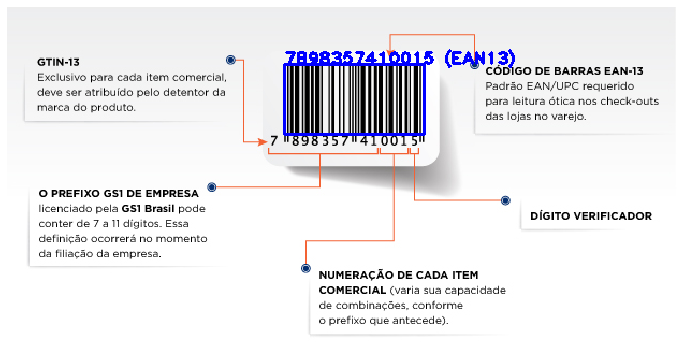

In [97]:
import matplotlib.pyplot as plt

image = plt.imread("gdrive/My Drive/Colab Notebooks/OpenCV/dataset/barcode_11.jpg")
barcode_list, image = barcode_reader(image)
plt.figure(figsize=(12,12))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(image)

# print do barcode_data e barcode_type
for barcode in barcode_list:
  print(barcode)

0652729101133 (EAN13)


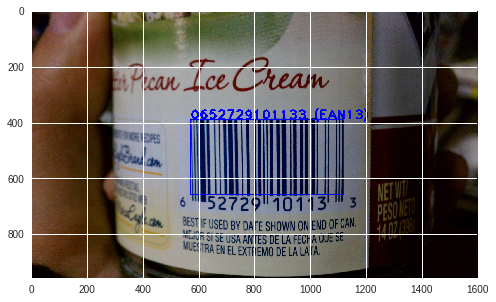

In [62]:
import matplotlib.pyplot as plt

image = plt.imread("gdrive/My Drive/Colab Notebooks/OpenCV/dataset/barcode_1.jpg")
barcode_list, image = barcode_reader(image)
plt.imshow(image)

# print do barcode_data e barcode_type
for barcode in barcode_list:
  print(barcode)

0049000069846 (EAN13)


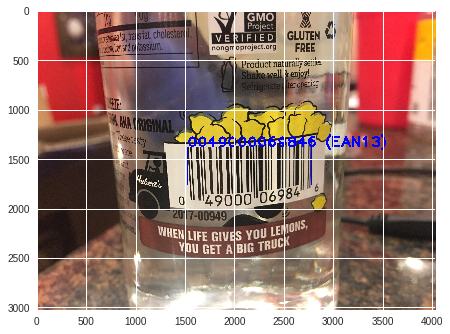

In [63]:
import matplotlib.pyplot as plt

image = plt.imread("gdrive/My Drive/Colab Notebooks/OpenCV/dataset/barcode_6.jpg")
barcode_list, image = barcode_reader(image)
plt.imshow(image)

# print do barcode_data e barcode_type
for barcode in barcode_list:
  print(barcode)

8888196904416 (EAN13)


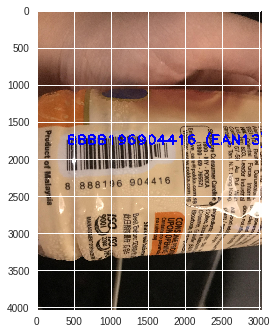

In [64]:
import matplotlib.pyplot as plt

image = plt.imread("gdrive/My Drive/Colab Notebooks/OpenCV/dataset/barcode_7.jpg")
barcode_list, image = barcode_reader(image)
plt.imshow(image)

# print do barcode_data e barcode_type
for barcode in barcode_list:
  print(barcode)

9419330000054 (EAN13)


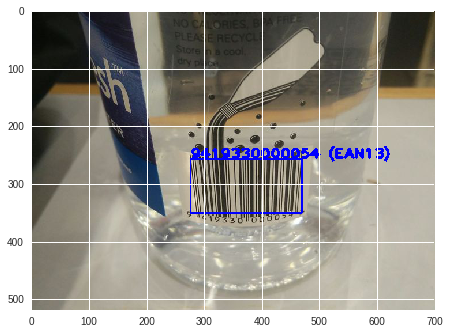

In [72]:
import matplotlib.pyplot as plt

image = plt.imread("gdrive/My Drive/Colab Notebooks/OpenCV/dataset/barcode_8.jpg")
barcode_list, image = barcode_reader(image)
plt.imshow(image)

# print do barcode_data e barcode_type
for barcode in barcode_list:
  print(barcode)